In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

import numpy as np

import matplotlib.pyplot as plt

import spacy

from wordcloud import WordCloud
import seaborn as sns

%matplotlib inline

import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#!python -m spacy download el_core_news_sm

In [3]:
start_page = 1
end_page = 35

start_url = 'https://www.newsbomb.gr/tag/troxaio-atyxhma?page='
main_url = 'https://www.newsbomb.gr'

test_url = start_url + str(start_page)

In [4]:
response = requests.get(test_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [5]:
teaser_articles_list = doc.find_all('div', {'class': 'card-item'})

In [6]:
link = teaser_articles_list[24].find('a')['href']
print(link)

/ellada/story/1441627/troxaio-atyxima-ston-kifiso-aftokinito-epese-se-prostateftiko-diazoma-afksimeni-kinisi


In [7]:
teasers_list = []

for page_num in range(start_page, end_page+1):
  page_url = start_url + str(page_num)
  response = requests.get(page_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  teaser_articles_list = doc.find_all('div', {'class': 'card-item'})


  for teaser in teaser_articles_list:
      story_dict = {}
      try:

        link = teaser.find('a')['href']
        if link.startswith("http"):
          story_dict['url'] = link
        else:
          story_dict['url'] = main_url + link
      except:
        story_dict['url'] = ''
        pass
      teasers_list.append(story_dict)
  time.sleep(1)

In [8]:
newsbomb_teasers_df = pd.DataFrame(teasers_list)
newsbomb_teasers_df

url
0    https://www.newsbomb.gr/sports/podosfairo/stor...
1    https://www.newsbomb.gr/ellada/story/1448567/l...
2    https://www.newsbomb.gr/ellada/story/1448513/s...
3    https://www.newsbomb.gr/ellada/story/1448504/t...
4    https://www.newsbomb.gr/ellada/story/1448196/i...
..                                                 ...
870  https://www.newsbomb.gr/kosmos/story/1042962/t...
871  https://www.newsbomb.gr/kosmos/story/1042754/v...
872  https://www.newsbomb.gr/ellada/story/1042781/t...
873  https://www.newsbomb.gr/ellada/story/1041926/t...
874  https://www.newsbomb.gr/ellada/story/1039427/k...

[875 rows x 1 columns]

In [9]:
newsbomb_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/proxeiro 2.csv', index=False)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
article_url = 'https://www.newsbomb.gr/ellada/story/1447349/sygkrousi-trenou-me-aftokinito-stin-iera-odo'

In [12]:
response = requests.get(article_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [ ]:
article = doc.find('div', {'class': 'main-text'})
print(article.prettify())

In [14]:
section = doc.find('a', {'class': 'main-category'}).text
section

'ΕΛΛΑΔΑ'

In [15]:
title = doc.find('h1').text
title

'Σύγκρουση τρένου με αυτοκίνητο στην Ιερά Οδό'

In [16]:
date = doc.find('time')['datetime']
print (date)

2023-07-11T18:50:21+03:00


In [17]:
paragraphs = doc.find_all('p')
paragraphs

[<p class="main-author story-author">
 <span class="author-name">Newsbomb</span>
 </p>,
 <p>Αυτοκίνητο παραβίασε τις μπάρες και συγκρούστηκε με αμαξοστοιχία στην <a href="https://www.newsbomb.gr/tag/iera-odos">Ιερά Οδό</a>. Πιθανές καθυστερήσεις και ακυρώσεις δρομολογίων.</p>,
 <p>Τροχαίο ατύχημα σημειώθηκε το απόγευμα της Τρίτης 11 Ιουλίου όταν αυτοκίνητο που οδηγούσε αλλοδαπός συγκρούστηκε με τρένο στο ύψος της Ιεράς Οδού.</p>,
 <p>Συγκεκριμένα το επιβατικό όχημα παραβίασε τις μπάρες στη διασταύρωση της σιδηροδρομικής γραμμής με την Ιερά Οδό και συγκρούστηκε με την αμαξοστοιχία 1325.</p>,
 <p>Άμεσα ειδοποιήθηκε η αστυνομία και ασθενοφόρο του ΕΚΑΒ.</p>,
 <p>Αναμένονται καθυστερήσεις αλλά και ακυρώσεις δρομολογίων στα δρομολόγια των τρένων.</p>]

In [18]:
p_texts_list = []
paragraphs = doc.find_all('p')
for p in paragraphs:
  p_texts_list.append(p.text)
full_text = ' '.join(p_texts_list)
full_text = "".join(full_text.splitlines())
full_text

'Newsbomb Αυτοκίνητο παραβίασε τις μπάρες και συγκρούστηκε με αμαξοστοιχία στην Ιερά Οδό. Πιθανές καθυστερήσεις και ακυρώσεις δρομολογίων. Τροχαίο ατύχημα σημειώθηκε το απόγευμα της Τρίτης 11 Ιουλίου όταν αυτοκίνητο που οδηγούσε αλλοδαπός συγκρούστηκε με τρένο στο ύψος της Ιεράς Οδού. Συγκεκριμένα το επιβατικό όχημα παραβίασε τις μπάρες στη διασταύρωση της σιδηροδρομικής γραμμής με την Ιερά Οδό και συγκρούστηκε με την αμαξοστοιχία 1325. Άμεσα ειδοποιήθηκε η αστυνομία και ασθενοφόρο του ΕΚΑΒ. Αναμένονται καθυστερήσεις αλλά και ακυρώσεις δρομολογίων στα δρομολόγια των τρένων.'

In [19]:
newsbomb_teasers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proxeiro 2.csv')
newsbomb_teasers_df

url
0    https://www.newsbomb.gr/sports/podosfairo/stor...
1    https://www.newsbomb.gr/ellada/story/1448567/l...
2    https://www.newsbomb.gr/ellada/story/1448513/s...
3    https://www.newsbomb.gr/ellada/story/1448504/t...
4    https://www.newsbomb.gr/ellada/story/1448196/i...
..                                                 ...
870  https://www.newsbomb.gr/kosmos/story/1042962/t...
871  https://www.newsbomb.gr/kosmos/story/1042754/v...
872  https://www.newsbomb.gr/ellada/story/1042781/t...
873  https://www.newsbomb.gr/ellada/story/1041926/t...
874  https://www.newsbomb.gr/ellada/story/1039427/k...

[875 rows x 1 columns]

In [22]:
full_articles_list = []

for article_url in newsbomb_teasers_df['url']:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  article = doc.find('div', {'class': 'main-text'})

  full_article_dict = {}

  # website
  full_article_dict['site'] = "newsbomb.gr"

  # url
  full_article_dict['url'] = article_url

  #section
  try:
    section = doc.find('a', {'class': 'main-category'}).text
    full_article_dict['section'] = section
  except:
    full_article_dict['section'] = ''
    pass

  #title
  try:
    title = doc.find('h1').text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = ''
    pass

  # date
  try:
    date = doc.find('time')['datetime']
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass

  # full_text
  try:
    p_texts_list = []
    paragraphs = article.find_all('p')
    for p in paragraphs:
      p_texts_list.append(p.text)
    full_text = ' '.join(p_texts_list)
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text
  except:
    full_article_dict['full_text'] = ''
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)

In [23]:
newsbomb_full_articles_df = pd.DataFrame(full_articles_list)
newsbomb_full_articles_df

site                                                url  \
0    newsbomb.gr  https://www.newsbomb.gr/sports/podosfairo/stor...   
1    newsbomb.gr  https://www.newsbomb.gr/ellada/story/1448567/l...   
2    newsbomb.gr  https://www.newsbomb.gr/ellada/story/1448513/s...   
3    newsbomb.gr  https://www.newsbomb.gr/ellada/story/1448504/t...   
4    newsbomb.gr  https://www.newsbomb.gr/ellada/story/1448196/i...   
..           ...                                                ...   
870  newsbomb.gr  https://www.newsbomb.gr/kosmos/story/1042962/t...   
871  newsbomb.gr  https://www.newsbomb.gr/kosmos/story/1042754/v...   
872  newsbomb.gr  https://www.newsbomb.gr/ellada/story/1042781/t...   
873  newsbomb.gr  https://www.newsbomb.gr/ellada/story/1041926/t...   
874  newsbomb.gr  https://www.newsbomb.gr/ellada/story/1039427/k...   

        section                                              title  \
0    ΠΟΔΟΣΦΑΙΡΟ  Λιονέλ Μέσι: Παραβίασε κόκκινο φανάρι, γλίτωσε...   
1        ΕΛΛΑΔΑ  Λαμία: Απίστευτες εικόνες με αυτοκίνητο να «κα...   
2        ΕΛΛΑΔΑ  Σοβαρό τροχαίο με τρεις τραυματίες στην Εθνική...   
3        ΕΛΛΑΔΑ  Τροχαίο με αγριογούρουνο στην Αταλάντη - Πληθα...   
4        ΕΛΛΑΔΑ  Ίλιον: Τροχαίο ατύχημα με αστυνομικούς της ομά...   
..          ...                                                ...   
870      ΚΟΣΜΟΣ  Τροχαίο ατύχημα για βουλευτή: Ήταν υπό την επή...   
871      ΚΟΣΜΟΣ  Βίντεο - ΣΟΚ: Κατέγραψε τον εαυτό του να τρακά...   
872      ΕΛΛΑΔΑ  ΤΩΡΑ: Τροχαίο στην Αθηνών - Λαμίας - Σφοδρή σύ...   
873      ΕΛΛΑΔΑ  Τροχαίο στην άνοδο του Κηφισό - Ουρές χιλιομέτ...   
874      ΕΛΛΑΔΑ  Κόπηκε στα δύο ο Κηφισός: Εγκλωβισμένοι οδηγοί...   

                          date  \
0    2023-07-16T15:58:17+03:00   
1    2023-07-15T08:53:22+03:00   
2    2023-07-15T01:06:22+03:00   
3    2023-07-14T23:32:47+03:00   
4    2023-07-14T08:34:55+03:00   
..                         ...   
870  2020-01-03T15:43:36+02:00   
871  2020-01-03T12:08:16+02:00   
872  2020-01-02T20:35:11+02:00   
873  2019-12-30T09:26:41+02:00   
874  2019-12-20T14:32:39+02:00   

                                             full_text  
0    Λιονέλ Μέσι: Επεισοδιακές είναι η πρώτες ημέρε...  
1    Λαμία: To αυτοκίνητο αφού χτύπησε ένα άλλο στη...  
2    Οι τραυματίες διακομίστηκαν στο νοσοκομείο ΑΧΕ...  
3    Ένα ακόμη τροχαίο ατύχημα με αγριογούρουνο σημ...  
4    Τροχαίο με τραυματίες αστυνομικούς της ομάδας ...  
..                                                 ...  
870  Αναλαμβάνει πλήρως την ευθύνη και μετανιώνει λ...  
871  Η εικόνα προκαλεί ΣΟΚ… Το περιστατικό συνέβη σ...  
872  Διαλύθηκε το Ι.Χ. Καθυστερήσεις σημειώνονται σ...  
873  Τροχαίο ατύχημα σημειώθηκε το πρωί της Δευτέρα...  
874  Σοβαρό τροχαίο ατύχημα σημειώθηκε το μεσημέρι ...  

[875 rows x 6 columns]

In [100]:
newsbomb_full_articles_df.to_csv('/content/drive/MyDrive/Colab Notebooks/proxeiro 2.csv')

In [101]:
newsbomb_full_articles_df.loc[0, 'date']

'2023-07-16T15:58:17+03:00'

In [26]:
import pytz

newsbomb_full_articles_df['datetime'] = pd.to_datetime(newsbomb_full_articles_df['date'], utc=True)
#newsbomb_full_articles_df['datetime'] = newsbomb_full_articles_df['datetime'].dt.tz_convert('UTC').dt.tz_localize(None)
newsbomb_full_articles_df['datetime'] = newsbomb_full_articles_df['datetime'].dt.tz_convert(pytz.timezone('Europe/Athens'))


In [27]:
newsbomb_full_articles_df['datetime']

0     2023-07-16 15:58:17+03:00
1     2023-07-15 08:53:22+03:00
2     2023-07-15 01:06:22+03:00
3     2023-07-14 23:32:47+03:00
4     2023-07-14 08:34:55+03:00
                 ...           
870   2020-01-03 15:43:36+02:00
871   2020-01-03 12:08:16+02:00
872   2020-01-02 20:35:11+02:00
873   2019-12-30 09:26:41+02:00
874   2019-12-20 14:32:39+02:00
Name: datetime, Length: 875, dtype: datetime64[ns, Europe/Athens]

In [28]:
short_newsbomb_df = newsbomb_full_articles_df[['datetime','full_text']]
short_newsbomb_df.head(1)


datetime                                          full_text
0 2023-07-16 15:58:17+03:00  Λιονέλ Μέσι: Επεισοδιακές είναι η πρώτες ημέρε...

In [ ]:
short_newsbomb_df['year'] = pd.DatetimeIndex(short_newsbomb_df['datetime']).year
short_newsbomb_df['month'] = pd.DatetimeIndex(short_newsbomb_df['datetime']).month
short_newsbomb_df['day'] = pd.DatetimeIndex(short_newsbomb_df['datetime']).day
short_newsbomb_df['hour'] = pd.DatetimeIndex(short_newsbomb_df['datetime']).hour

<Axes: >

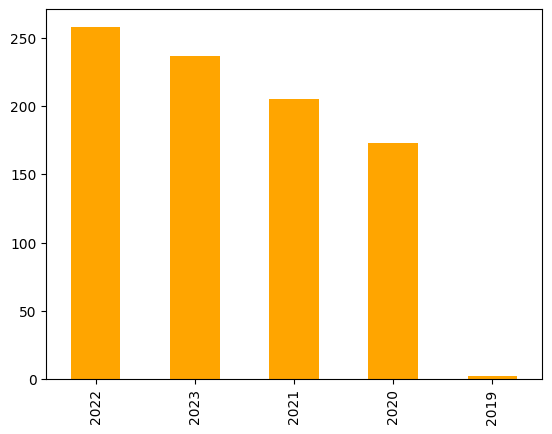

In [30]:
short_newsbomb_df['year'].value_counts().plot(kind='bar', color='orange')

In [31]:
text = short_newsbomb_df['full_text'].str.cat(sep = ' ')

In [32]:
nlp = spacy.load('el_core_news_sm')

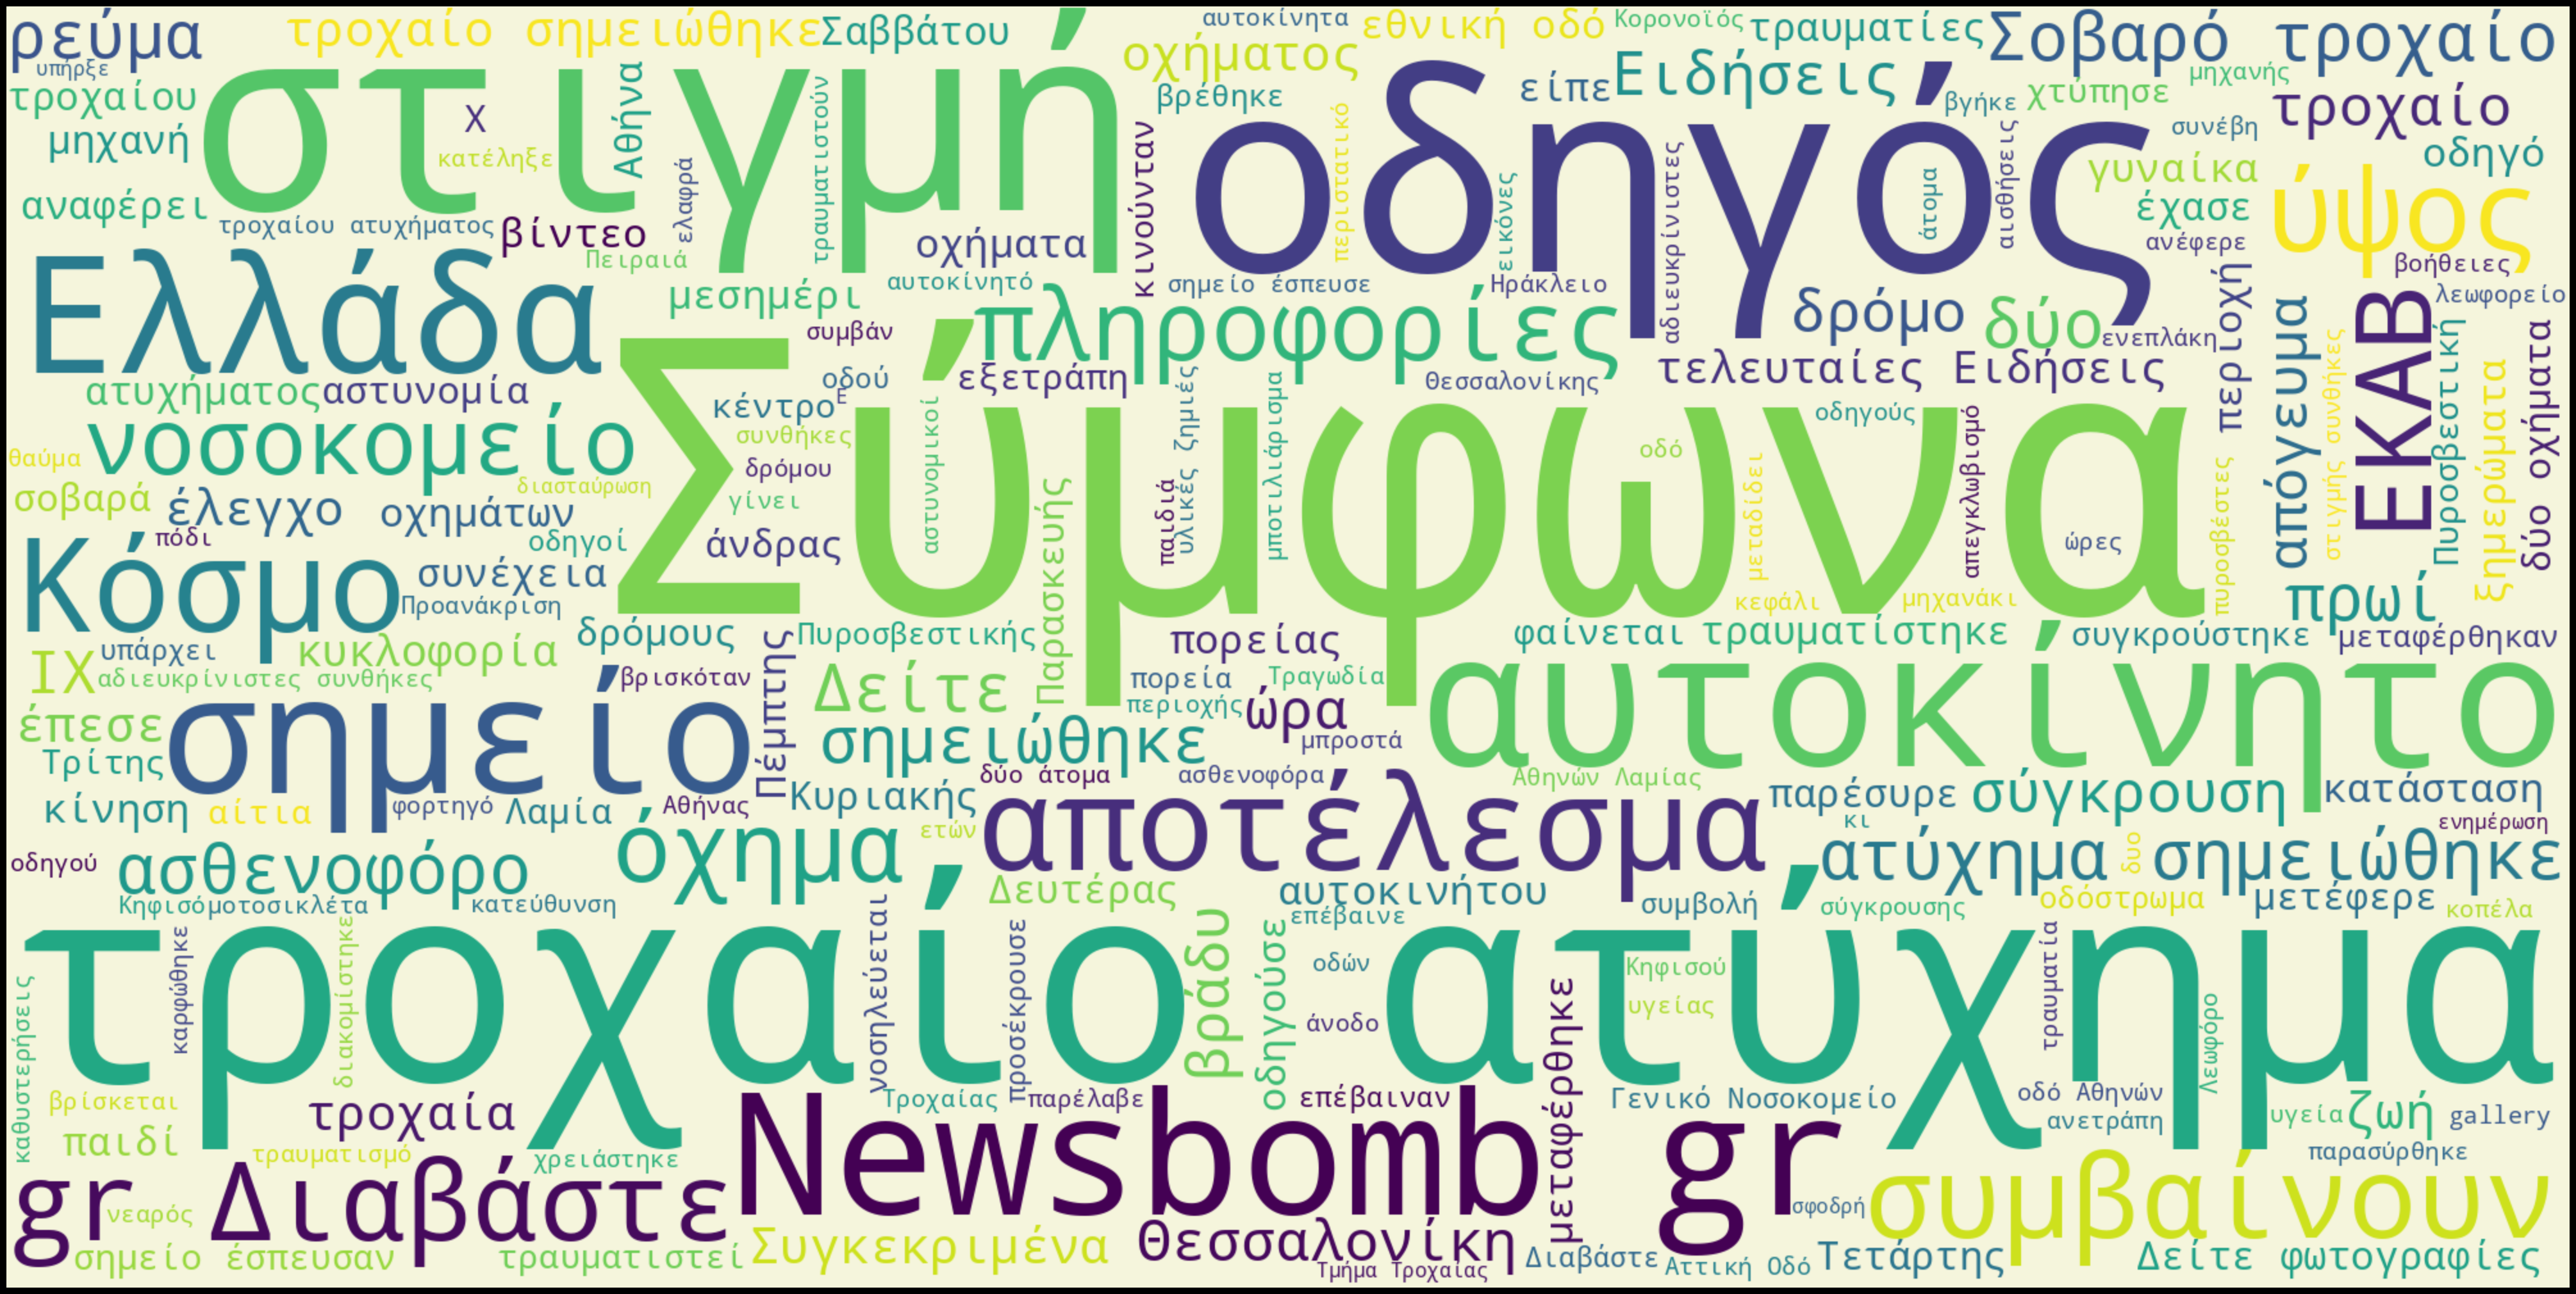

In [33]:
wordcloud3 = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'beige'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud3, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
wordcloud3.to_file('/content/drive/MyDrive/Colab Notebooks/wordcloud3.png')

In [34]:
full_doc = nlp(text)

In [35]:
small_txt = 'το αυτοκίνητο χτύπησε ένα από τα ζώα'

In [36]:
small_doc = nlp(small_txt)
for token in small_doc:
  print (token, ' ',token.lemma )

το   649162154811314699
αυτοκίνητο   7220928953821008123
χτύπησε   6935044526623448424
ένα   3955702389344751046
από   5121026152961420178
τα   649162154811314699
ζώα   16721545213082092106


In [37]:
lemmatized_text = ' '.join(token.lemma_ for token in full_doc)

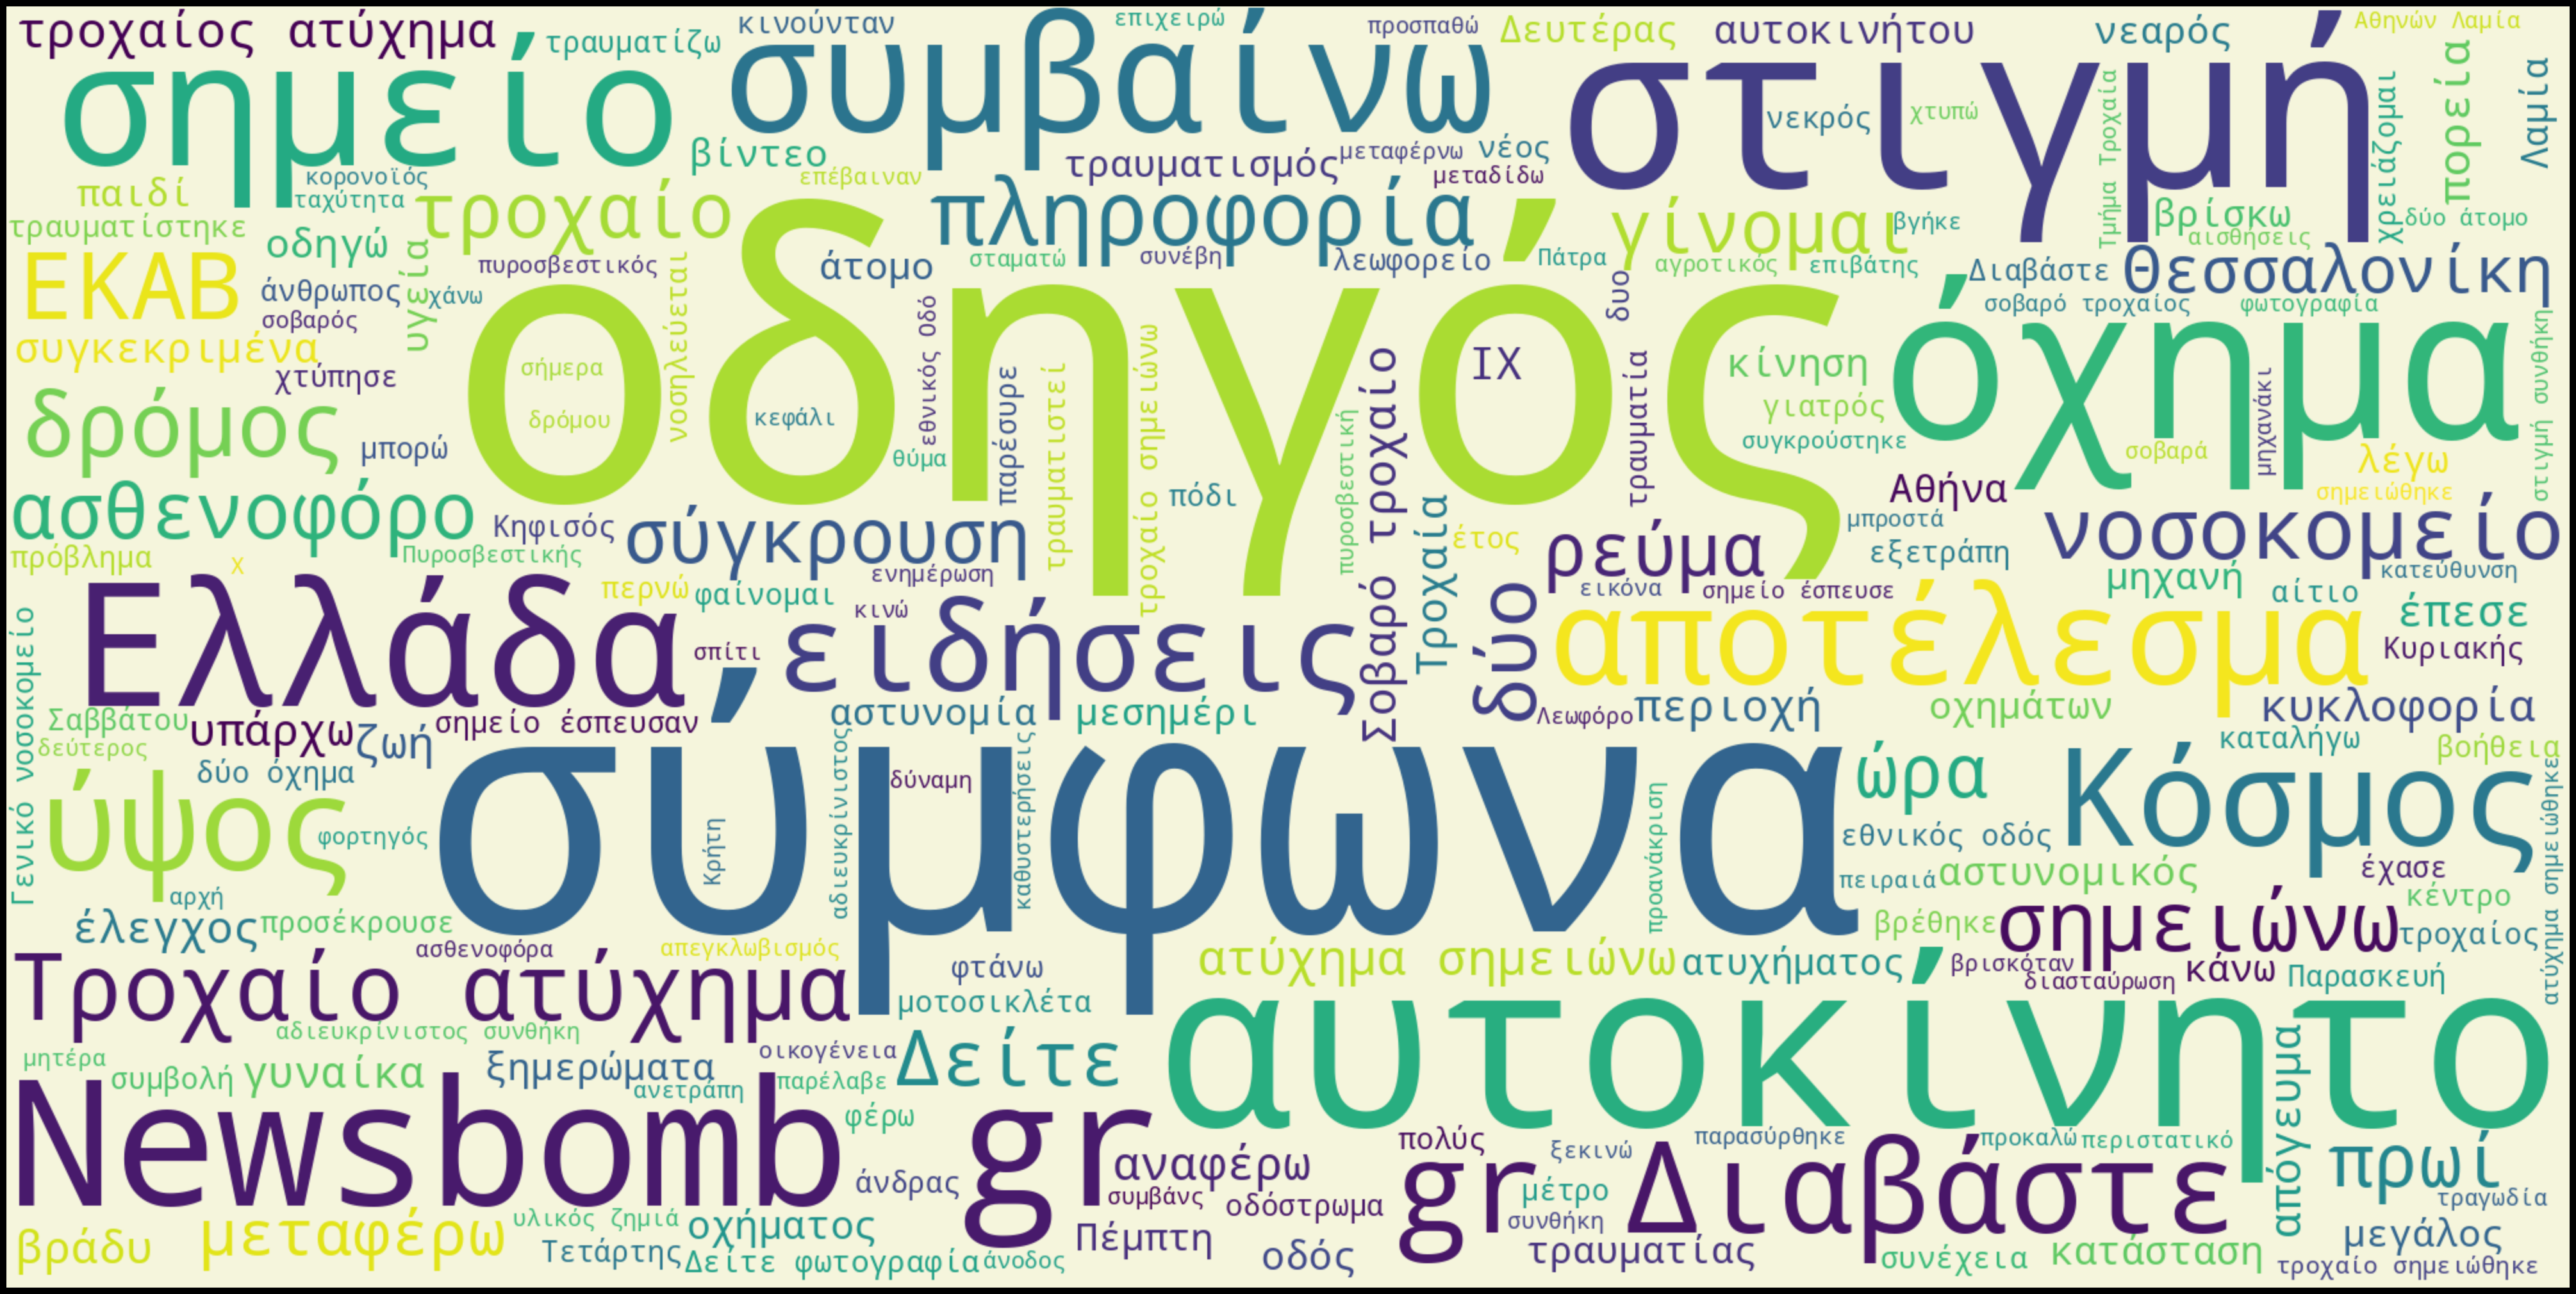

In [38]:
wordcloud4 = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'beige'
 ).generate(lemmatized_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud4, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
wordcloud4.to_file('/content/drive/MyDrive/Colab Notebooks/wordcloud4.png')

In [39]:
cv = CountVectorizer()

In [40]:
count_vector = cv.fit_transform(short_newsbomb_df['full_text'])

In [41]:
count_vector.shape

(875, 12064)

In [42]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

In [43]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))
count_vector = cv.fit_transform(short_newsbomb_df['full_text'])

In [44]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

In [45]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [46]:
count_vector = cv.fit_transform(short_newsbomb_df['full_text'])

In [47]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(short_newsbomb_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())


In [48]:
results.sum(axis =0).sort_values(ascending = False)

τροχαίο       1329
gr             791
ατύχημα        786
σημειώθηκε     721
σύμφωνα        655
σημείο         638
αυτοκίνητο     627
δύο            627
οδηγός         612
νοσοκομείο     597
στιγμή         521
newsbomb       497
διαβάστε       462
δείτε          439
ελλάδα         437
ειδήσεις       434
αποτέλεσμα     427
κόσμο          415
όχημα          410
συμβαίνουν     404
dtype: int64

In [49]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

τροχαίο       1329
gr             791
ατύχημα        786
σημειώθηκε     721
σύμφωνα        655
dtype: int64

<Axes: >

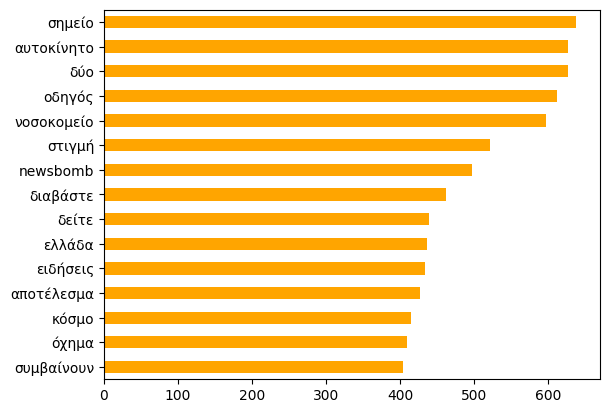

In [50]:
sum_words.sort_values(ascending = True).head(15).plot(kind='barh', color='orange')

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_newsbomb_df['full_text'])

In [53]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

In [55]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [60]:
arr = cosine_similarity(tfidf_matrix_train[0:50], tfidf_matrix_train[0:50])

<Axes: title={'center': 'Βαθμός ομοιότητας των 50 πρώτων άρθρων'}>

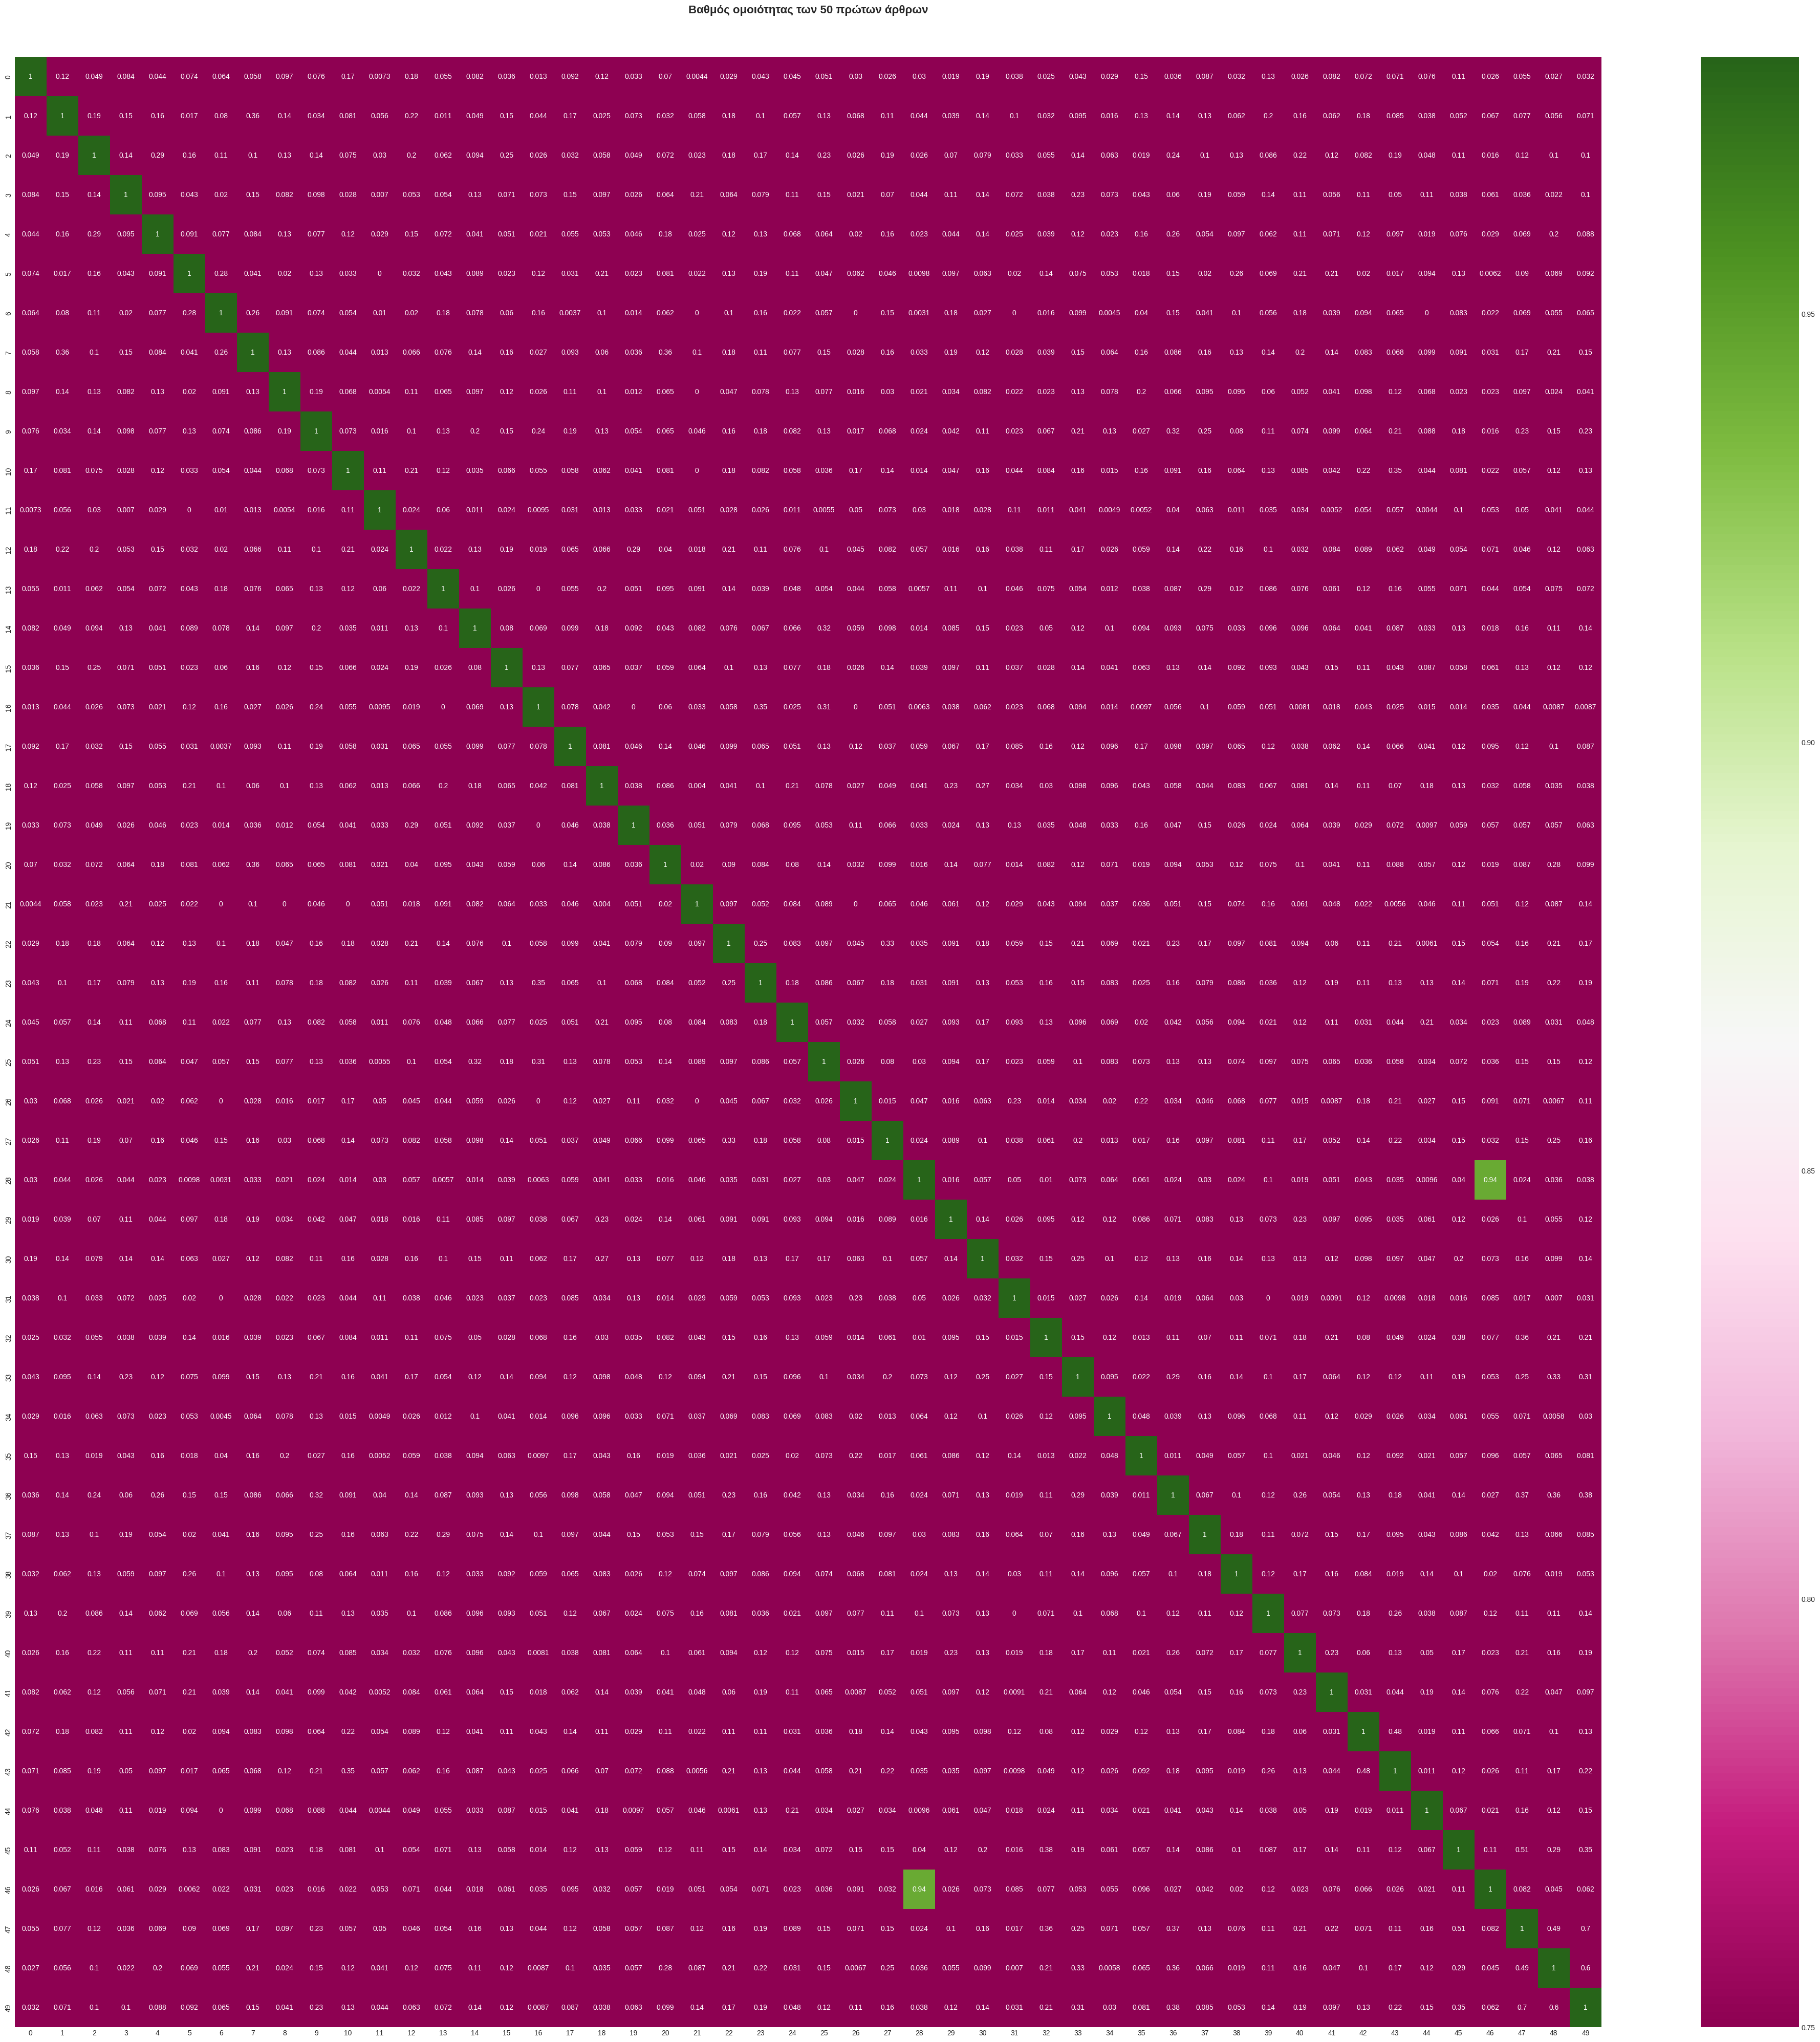

In [103]:
plt.figure(figsize=(50, 50))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 50 πρώτων άρθρων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

In [62]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [63]:
emolex_df = pd.read_csv(filepath)

In [64]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [65]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [66]:
matrix = vec.fit_transform(short_newsbomb_df['full_text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

In [67]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']


angry_words = emolex_df[emolex_df.Anger == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [68]:
wordcount_df[trust_words]

αμην  γαμηλιο ταξιδι  διευθυντρια σχολειου  επικοινωνω  εκκλησια  \
0       0               0                     0           0         0   
1       0               0                     0           0         0   
2       0               0                     0           0         0   
3       0               0                     0           0         0   
4       0               0                     0           0         0   
..    ...             ...                   ...         ...       ...   
870     0               0                     0           0         0   
871     0               0                     0           0         0   
872     0               0                     0           0         0   
873     0               0                     0           0         0   
874     0               0                     0           0         0   

     εν τω μεταξυ  ευαγγελιο  κυριε  λιστα ελεγχου  λυρικη σκηνη  ...  \
0               0          0      0              0             0  ...   
1               0          0      0              0             0  ...   
2               0          0      0              0             0  ...   
3               0          0      0              0             0  ...   
4               0          0      0              0             0  ...   
..            ...        ...    ...            ...           ...  ...   
870             0          0      0              0             0  ...   
871             0          0      0              0             0  ...   
872             0          0      0              0             0  ...   
873             0          0      0              0             0  ...   
874             0          0      0              0             0  ...   

     ηλιακο ωρολογιο  συνεργιστικος  διπλο ποδηλατο  ισαξιος  ανακωχη  αληθης  \
0                  0              0               0        0        0       0   
1                  0              0               0        0        0       0   
2                  0              0               0        0        0       0   
3                  0              0               0        0        0       0   
4                  0              0               0        0        0       0   
..               ...            ...             ...      ...      ...     ...   
870                0              0               0        0        0       0   
871                0              0               0        0        0       0   
872                0              0               0        0        0       0   
873                0              0               0        0        0       0   
874                0              0               0        0        0       0   

     αναμφιβολως  ανυπερβατος  αναθηματικος  αποδειξη πληρωμης  
0              0            0             0                  0  
1              0            0             0                  0  
2              0            0             0                  0  
3              0            0             0                  0  
4              0            0             0                  0  
..           ...          ...           ...                ...  
870            0            0             0                  0  
871            0            0             0                  0  
872            0            0             0                  0  
873            0            0             0                  0  
874            0            0             0                  0  

[875 rows x 1259 columns]

In [69]:
wordcount_df[trust_words].sum(axis=1)

0       5
1      11
2       3
3       4
4       2
       ..
870     7
871     1
872     3
873     1
874     0
Length: 875, dtype: int64

In [70]:
short_newsbomb_df['anger'] = wordcount_df[angry_words].sum(axis=1) #axis = row

short_newsbomb_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_newsbomb_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_newsbomb_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_newsbomb_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_newsbomb_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_newsbomb_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_newsbomb_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_newsbomb_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_newsbomb_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [71]:
short_newsbomb_df

datetime  \
0   2023-07-16 15:58:17+03:00   
1   2023-07-15 08:53:22+03:00   
2   2023-07-15 01:06:22+03:00   
3   2023-07-14 23:32:47+03:00   
4   2023-07-14 08:34:55+03:00   
..                        ...   
870 2020-01-03 15:43:36+02:00   
871 2020-01-03 12:08:16+02:00   
872 2020-01-02 20:35:11+02:00   
873 2019-12-30 09:26:41+02:00   
874 2019-12-20 14:32:39+02:00   

                                             full_text  year  month  day  \
0    Λιονέλ Μέσι: Επεισοδιακές είναι η πρώτες ημέρε...  2023      7   16   
1    Λαμία: To αυτοκίνητο αφού χτύπησε ένα άλλο στη...  2023      7   15   
2    Οι τραυματίες διακομίστηκαν στο νοσοκομείο ΑΧΕ...  2023      7   15   
3    Ένα ακόμη τροχαίο ατύχημα με αγριογούρουνο σημ...  2023      7   14   
4    Τροχαίο με τραυματίες αστυνομικούς της ομάδας ...  2023      7   14   
..                                                 ...   ...    ...  ...   
870  Αναλαμβάνει πλήρως την ευθύνη και μετανιώνει λ...  2020      1    3   
871  Η εικόνα προκαλεί ΣΟΚ… Το περιστατικό συνέβη σ...  2020      1    3   
872  Διαλύθηκε το Ι.Χ. Καθυστερήσεις σημειώνονται σ...  2020      1    2   
873  Τροχαίο ατύχημα σημειώθηκε το πρωί της Δευτέρα...  2019     12   30   
874  Σοβαρό τροχαίο ατύχημα σημειώθηκε το μεσημέρι ...  2019     12   20   

     hour  anger  positive  joy  disgust  surprise  trust  anticipation  \
0      15      2         6    3        2         2      5             5   
1       8      3         7    1        1         1     11             3   
2       1      3         2    0        1         2      3             1   
3      23      2         3    0        2         2      4             1   
4       8      1         3    1        1         1      2             1   
..    ...    ...       ...  ...      ...       ...    ...           ...   
870    15      3         6    1        3         2      7             2   
871    12      2         2    0        1         2      1             1   
872    20      1         1    1        0         2      3             2   
873     9      2         3    1        1         1      1             3   
874    14      5         2    1        3         5      0             3   

     sadness  negative  fear  
0          2         2     2  
1          4         4     4  
2          5         4     6  
3          2         2     2  
4          1         1     1  
..       ...       ...   ...  
870        4         7     4  
871        0         2     2  
872        1         1     1  
873        1         2     2  
874        6         6     5  

[875 rows x 16 columns]

In [72]:
short_newsbomb_df.reset_index(inplace=True)
short_newsbomb_df.set_index('datetime', inplace=True)
short_newsbomb_df

index  \
datetime                           
2023-07-16 15:58:17+03:00      0   
2023-07-15 08:53:22+03:00      1   
2023-07-15 01:06:22+03:00      2   
2023-07-14 23:32:47+03:00      3   
2023-07-14 08:34:55+03:00      4   
...                          ...   
2020-01-03 15:43:36+02:00    870   
2020-01-03 12:08:16+02:00    871   
2020-01-02 20:35:11+02:00    872   
2019-12-30 09:26:41+02:00    873   
2019-12-20 14:32:39+02:00    874   

                                                                   full_text  \
datetime                                                                       
2023-07-16 15:58:17+03:00  Λιονέλ Μέσι: Επεισοδιακές είναι η πρώτες ημέρε...   
2023-07-15 08:53:22+03:00  Λαμία: To αυτοκίνητο αφού χτύπησε ένα άλλο στη...   
2023-07-15 01:06:22+03:00  Οι τραυματίες διακομίστηκαν στο νοσοκομείο ΑΧΕ...   
2023-07-14 23:32:47+03:00  Ένα ακόμη τροχαίο ατύχημα με αγριογούρουνο σημ...   
2023-07-14 08:34:55+03:00  Τροχαίο με τραυματίες αστυνομικούς της ομάδας ...   
...                                                                      ...   
2020-01-03 15:43:36+02:00  Αναλαμβάνει πλήρως την ευθύνη και μετανιώνει λ...   
2020-01-03 12:08:16+02:00  Η εικόνα προκαλεί ΣΟΚ… Το περιστατικό συνέβη σ...   
2020-01-02 20:35:11+02:00  Διαλύθηκε το Ι.Χ. Καθυστερήσεις σημειώνονται σ...   
2019-12-30 09:26:41+02:00  Τροχαίο ατύχημα σημειώθηκε το πρωί της Δευτέρα...   
2019-12-20 14:32:39+02:00  Σοβαρό τροχαίο ατύχημα σημειώθηκε το μεσημέρι ...   

                           year  month  day  hour  anger  positive  joy  \
datetime                                                                  
2023-07-16 15:58:17+03:00  2023      7   16    15      2         6    3   
2023-07-15 08:53:22+03:00  2023      7   15     8      3         7    1   
2023-07-15 01:06:22+03:00  2023      7   15     1      3         2    0   
2023-07-14 23:32:47+03:00  2023      7   14    23      2         3    0   
2023-07-14 08:34:55+03:00  2023      7   14     8      1         3    1   
...                         ...    ...  ...   ...    ...       ...  ...   
2020-01-03 15:43:36+02:00  2020      1    3    15      3         6    1   
2020-01-03 12:08:16+02:00  2020      1    3    12      2         2    0   
2020-01-02 20:35:11+02:00  2020      1    2    20      1         1    1   
2019-12-30 09:26:41+02:00  2019     12   30     9      2         3    1   
2019-12-20 14:32:39+02:00  2019     12   20    14      5         2    1   

                           disgust  surprise  trust  anticipation  sadness  \
datetime                                                                     
2023-07-16 15:58:17+03:00        2         2      5             5        2   
2023-07-15 08:53:22+03:00        1         1     11             3        4   
2023-07-15 01:06:22+03:00        1         2      3             1        5   
2023-07-14 23:32:47+03:00        2         2      4             1        2   
2023-07-14 08:34:55+03:00        1         1      2             1        1   
...                            ...       ...    ...           ...      ...   
2020-01-03 15:43:36+02:00        3         2      7             2        4   
2020-01-03 12:08:16+02:00        1         2      1             1        0   
2020-01-02 20:35:11+02:00        0         2      3             2        1   
2019-12-30 09:26:41+02:00        1         1      1             3        1   
2019-12-20 14:32:39+02:00        3         5      0             3        6   

                           negative  fear  
datetime                                   
2023-07-16 15:58:17+03:00         2     2  
2023-07-15 08:53:22+03:00         4     4  
2023-07-15 01:06:22+03:00         4     6  
2023-07-14 23:32:47+03:00         2     2  
2023-07-14 08:34:55+03:00         1     1  
...                             ...   ...  
2020-01-03 15:43:36+02:00         7     4  
2020-01-03 12:08:16+02:00         2     2  
2020-01-02 20:35:11+02:00         1     1  
2019-12-30 09:26:41+02:00         2     2 

<Axes: xlabel='datetime'>

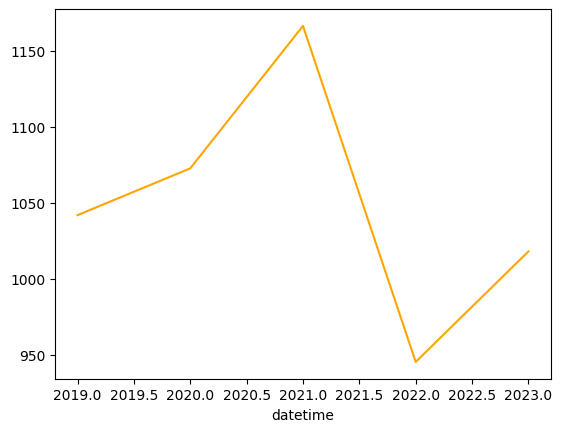

In [73]:
short_newsbomb_df['full_text'].str.len().groupby(by=short_newsbomb_df.index.year).mean().plot(color='orange')

<Axes: xlabel='datetime'>

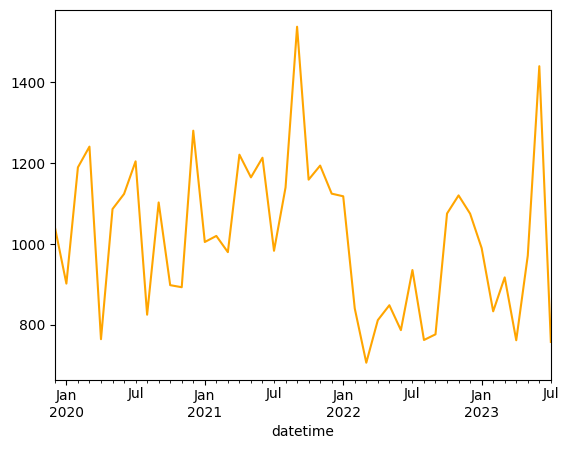

In [74]:
short_newsbomb_df['full_text'].str.len().resample('M').mean().plot(color='orange')

<Axes: ylabel='datetime'>

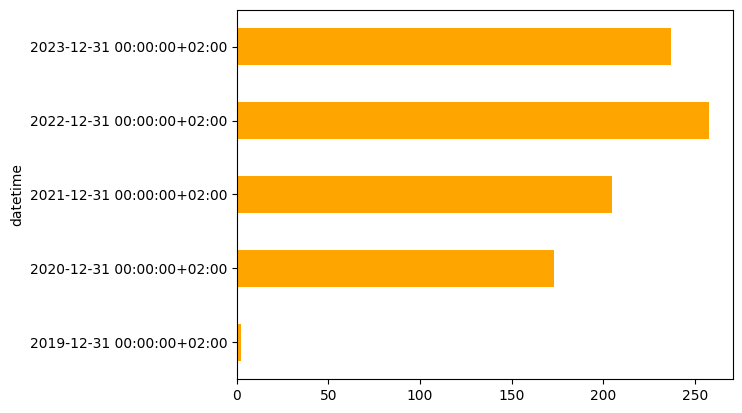

In [75]:
short_newsbomb_df['full_text'].resample('Y').count().plot(kind='barh', color='orange')

<Axes: xlabel='datetime'>

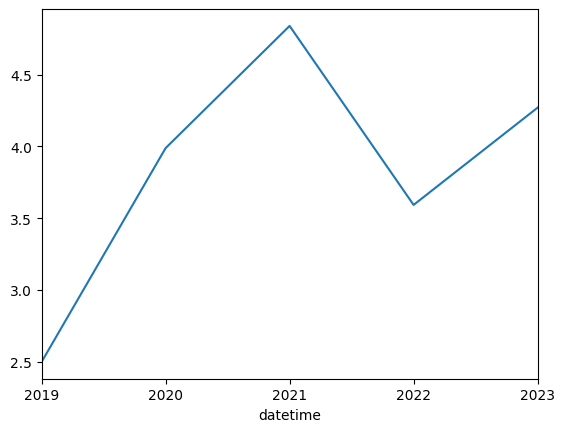

In [76]:
short_newsbomb_df['positive'].resample('Y').mean().plot()

<Axes: xlabel='datetime'>

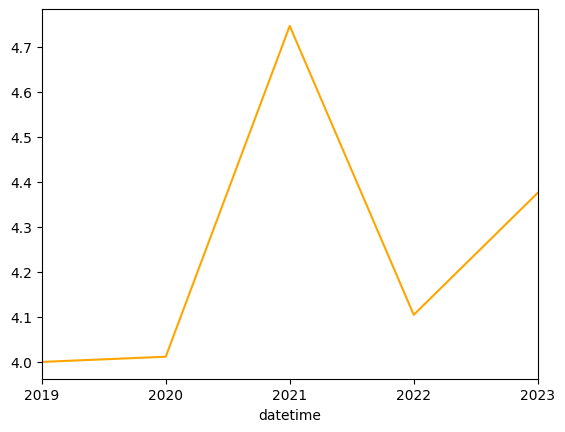

In [77]:
short_newsbomb_df['negative'].resample('Y').mean().plot(color='orange')

<Axes: xlabel='datetime'>

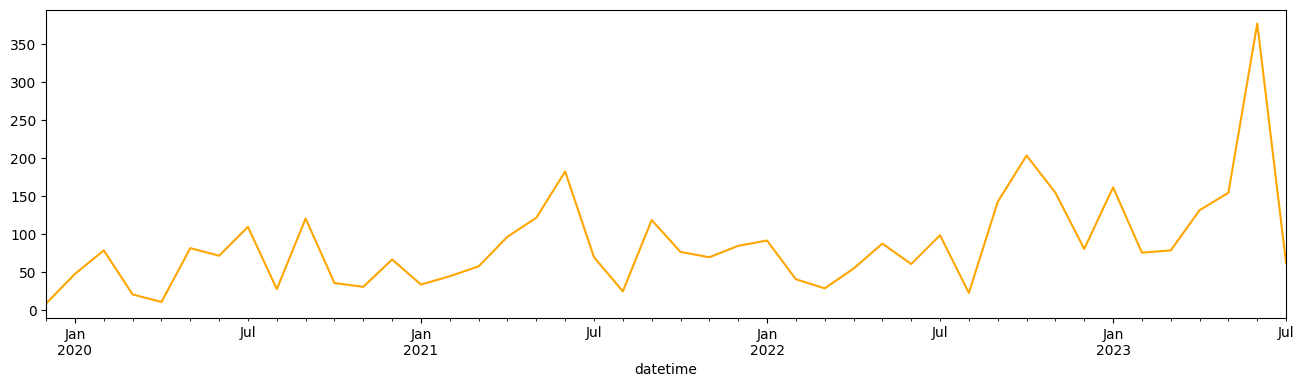

In [80]:
short_newsbomb_df['negative'].resample('M').sum().plot(figsize=(16,4), color='orange')

<Axes: xlabel='datetime'>

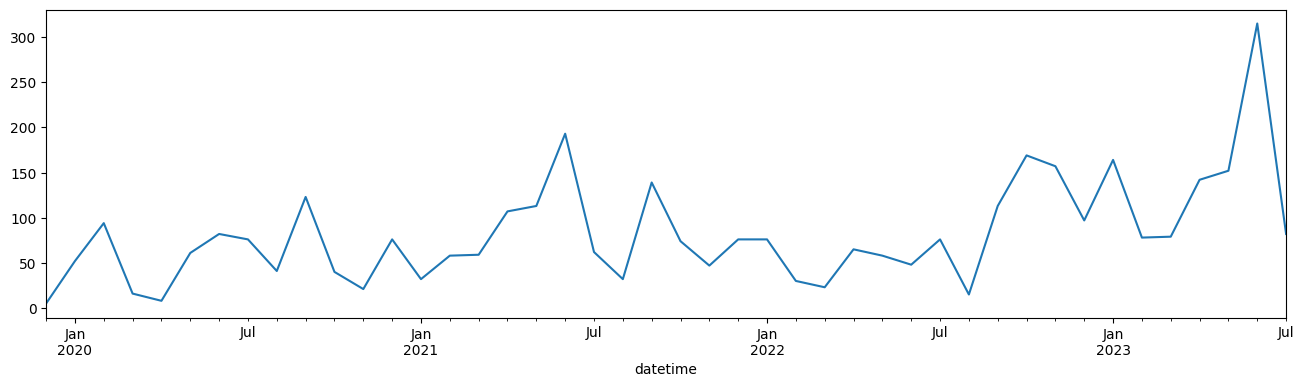

In [82]:
short_newsbomb_df['positive'].resample('M').sum().plot(figsize=(16,4))

<Axes: xlabel='datetime'>

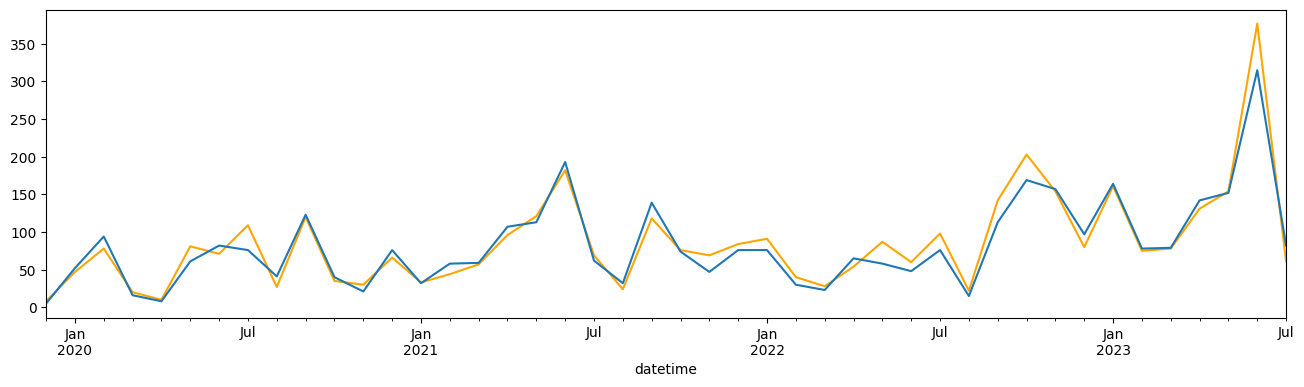

In [84]:
ax = short_newsbomb_df['negative'].resample('M').sum().plot(figsize=(16,4), color = 'orange')
short_newsbomb_df['positive'].resample('M').sum().plot(figsize=(16,4), ax = ax)

In [85]:
plt.style.use('default')

In [86]:
plt.style.use('Solarize_Light2')

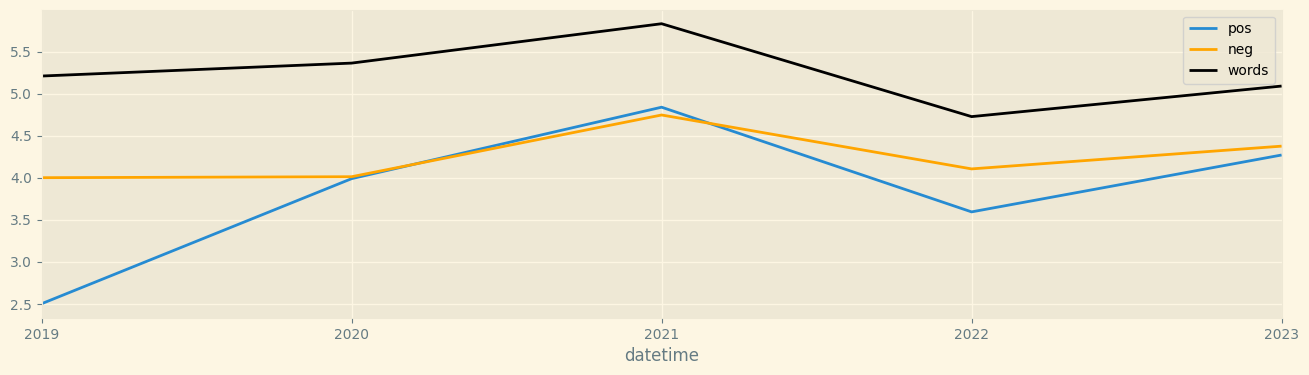

In [87]:
ax = short_newsbomb_df['positive'].resample('Y').mean().plot(figsize=(16,4), #ΜΟ λέξεων κάθε συναισθήματος
                                                          label='pos')
short_newsbomb_df['negative'].resample('Y').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'orange')
(short_newsbomb_df['full_text'].str.len().resample('Y').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

<Axes: xlabel='datetime'>

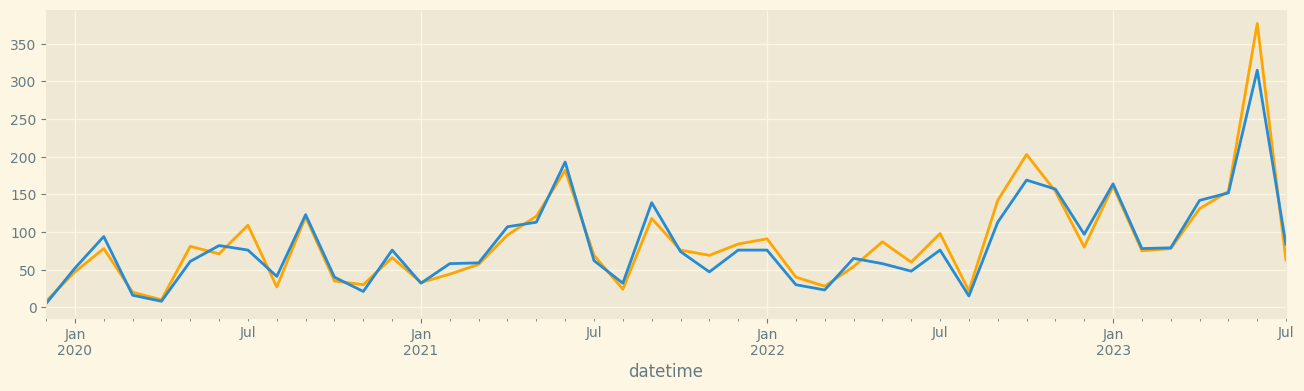

In [91]:
ax = short_newsbomb_df['negative'].resample('M').sum().plot(figsize=(16,4), color = 'orange', label='neg')
short_newsbomb_df['positive'].resample('M').sum().plot(figsize=(16,4), ax = ax, label='pos')

<Axes: xlabel='datetime'>

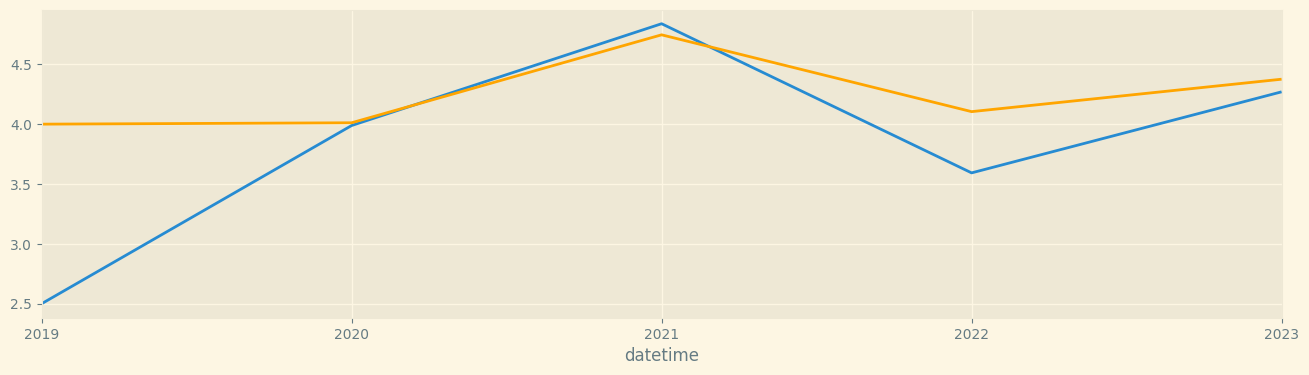

In [92]:
ax = short_newsbomb_df['positive'].resample('Y').mean().plot(figsize=(16,4), #ΜΟ λέξεων κάθε συναισθήματος
                                                          label='pos')
short_newsbomb_df['negative'].resample('Y').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'orange')

In [93]:
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='datetime'>

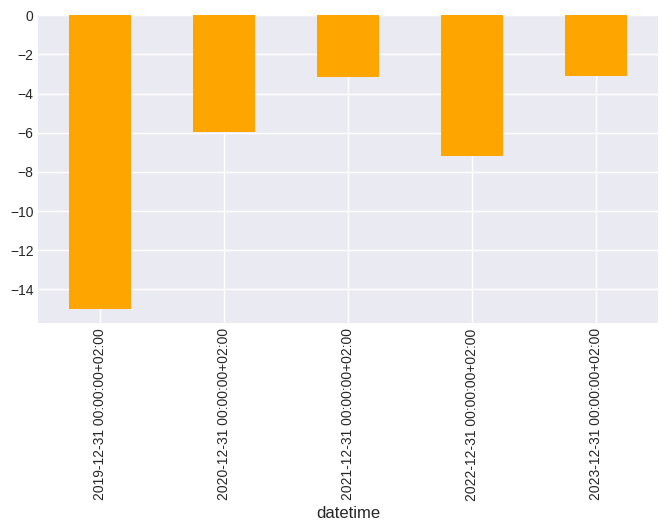

In [97]:
short_newsbomb_df['(-)αρνητικότητα | θετικότητα(+)'] = short_newsbomb_df.positive*100//short_newsbomb_df[['positive','negative']].sum(
        axis=1) - short_newsbomb_df.negative*100//short_newsbomb_df[['positive','negative']].sum(axis=1)

short_newsbomb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('Y').mean().plot(kind='bar',
                                                                               color=(short_newsbomb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'blue', False: 'orange'}), figsize=(8,4))

In [98]:
short_newsbomb_df[(short_newsbomb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_newsbomb_df['(-)αρνητικότητα | θετικότητα(+)'].max()) | #το περισσότερο θετικό
                  (short_newsbomb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_newsbomb_df['(-)αρνητικότητα | θετικότητα(+)'].min()) #περισσότερο αρνητικό
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

index  positive  negative  \
datetime                                               
2023-07-11 05:15:50+03:00      9         0         1   
2023-07-05 07:43:59+03:00     16         1         0   
2023-06-25 14:34:28+03:00     24         0         3   
2023-06-13 22:29:21+03:00     43         0         1   
2023-06-12 07:19:19+03:00     48         3         0   
...                          ...       ...       ...   
2020-07-13 10:12:23+03:00    785         0         2   
2020-07-02 15:03:46+03:00    791         0         3   
2020-05-16 17:04:30+03:00    824         0         3   
2020-05-14 01:30:08+03:00    825         0         2   
2020-04-25 00:30:05+03:00    832         0         3   

                           (-)αρνητικότητα | θετικότητα(+)  
datetime                                                    
2023-07-11 05:15:50+03:00                           -100.0  
2023-07-05 07:43:59+03:00                            100.0  
2023-06-25 14:34:28+03:00                           -100.0  
2023-06-13 22:29:21+03:00                           -100.0  
2023-06-12 07:19:19+03:00                            100.0  
...                                                    ...  
2020-07-13 10:12:23+03:00                           -100.0  
2020-07-02 15:03:46+03:00                           -100.0  
2020-05-16 17:04:30+03:00                           -100.0  
2020-05-14 01:30:08+03:00                           -100.0  
2020-04-25 00:30:05+03:00                           -100.0  

[91 rows x 4 columns]

In [99]:
newsbomb_full_articles_df.loc[[47,23,720,823,831], ['url','title', 'full_text']]

url  \
47   https://www.newsbomb.gr/ellada/story/1436666/t...   
23   https://www.newsbomb.gr/ellada/story/1441794/s...   
720  https://www.newsbomb.gr/ellada/story/1132854/k...   
823  https://www.newsbomb.gr/kosmos/story/1082989/s...   
831  https://www.newsbomb.gr/ellada/story/1075791/s...   

                                                 title  \
47   Τροχαίο στην Κηφισίας: Σοβαρά οι τραυματίες απ...   
23   Σοβαρό τροχαίο στη λεωφόρο Μαραθώνος - Πληροφο...   
720  Κίνηση στους δρόμους: Τροχαίο στην Λεωφόρο Κηφ...   
823  ΣΟΚ: Σέξι Ρωσίδα εκσφενδονίστηκε από μηχανή πο...   
831  Σοκαριστικό τροχαίο στην Εγνατία: Βυτιοφόρο «κ...   

                                             full_text  
47   Σοβαρό τροχαίο σημειώθηκε το πρωί της Δευτέρας...  
23   Σοβαρό τροχαίο ατύχημα σημειώθηκε λίγο μετά τι...  
720  Αυξημένη κυκλοφοριακή συμφόρηση σε πολλούς δρό...  
823  Είχε Άγιο η Ρωσίδα αναβάτρια… Σοκάρει το βίντε...  
831  Τρόμος στην Εγνατία Οδό από την τρελή πορεία β...